In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import lsst.ts.observatory.model as om

In [3]:
observatoryModel = om.ObservatoryModel()
observatoryModel.configure_from_module()

In [4]:
# Set up grid to calculate slew times *to*
altitude = np.arange(0, 90, 0.25)
azimuth = np.arange(-180, 180, 0.5)
alt, az = np.meshgrid(altitude, azimuth)
#alt = np.ravel(alt)
#az = np.ravel(az)

In [5]:
# Set location of telescope
telAlt = 80.0
telAz = 0
observatoryModel.slew_altaz(time=0, alt_rad=np.radians(telAlt), az_rad=np.radians(telAz), 
                            rot_rad=0, band_filter='r')
print(observatoryModel.current_state)

t=7.7 ra=29.510 dec=-20.244 ang=180.000 filter=r track=False alt=80.000 az=0.000 pa=180.000 rot=0.000 telaz=0.000 telrot=0.000 mounted=['g', 'r', 'i', 'z', 'y'] unmounted=['u']


In [6]:
# Calculate slew times
slewtimes = observatoryModel.get_approximate_slew_delay(alt_rad=np.radians(alt), az_rad=np.radians(az), 
                                                        goal_filter='r', lax_dome=False)

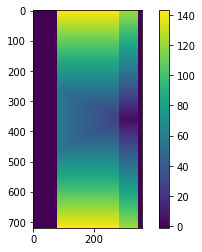

In [7]:
# Plot slew times ... (figure out how to do polar plot, with contourf .. or at least, a better imshow plot)
cs = plt.imshow(slewtimes)
plt.colorbar(cs)